# Notebook 0: Exploratory Data Analysis

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

## Roadmap

Our plan is to load some data and visualize the various features that are included in the dataset.

## 1. Load a CSV file

First, we load one of the CSV files. The exact way you do this will differ between a local notebook and a Kaggle notebook.

In [2]:
input_dir = "/global/cfs/cdirs/m3443/data/PowerWeek/train/train"
csv_files = [os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.csv')]

In [3]:
events = pd.read_csv(csv_files[0])

## 2. Initial Inspection

Let's examine the dataframe and see what is available.

In [4]:
events.head()

event  hit_number     N         E      T  ix  iy  iz        posx    posy  \
0  27000           0  1895  0.261049  17.51  82  60   0  117.543274  27.425   
1  27000           1  1895  1.218229  12.57  38  42   0  -82.629840 -62.575   
2  27000           2  1895  0.983161  12.61  38  43   0  -82.629840 -67.425   
3  27000           3  1895  0.404564  12.57  45  42   0  -77.370160 -62.575   
4  27000           4  1895  0.393017  13.46  39  43   1  -87.543280 -67.425   

     posz             clusterID  Efrac             uniqueID  
0  365.28  11509158343811193875    1.0 -6937585729898357741  
1  363.28  17828652613631594586    1.0  -618091460077957030  
2  365.28  17828652613631594586    1.0  5343361554445887269  
3  361.28  17828652613631594586    1.0 -7175626205880516806  
4  383.28  17828652613631594586    1.0 -3965530794151426912

## 3. Visualize Distributions

It's usually very useful to understand the histogrammed distribution of the features in the dataset. This helps with feature engineering, and gaining some physical intuition about how to further visualize combinations of features.

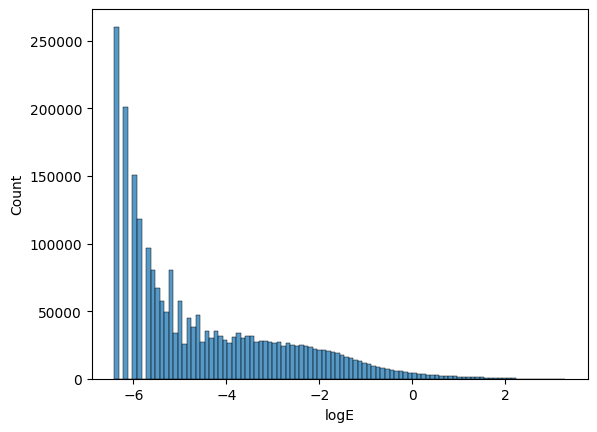

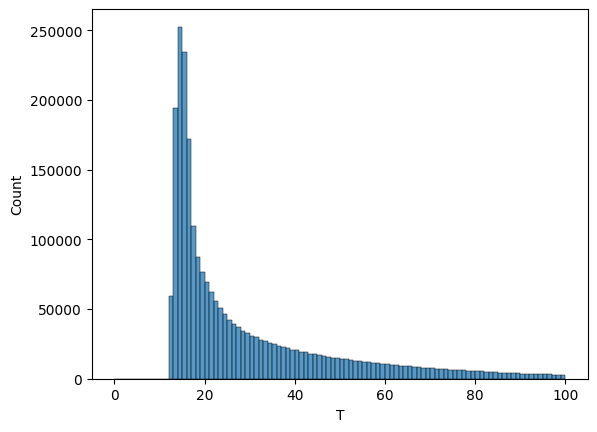

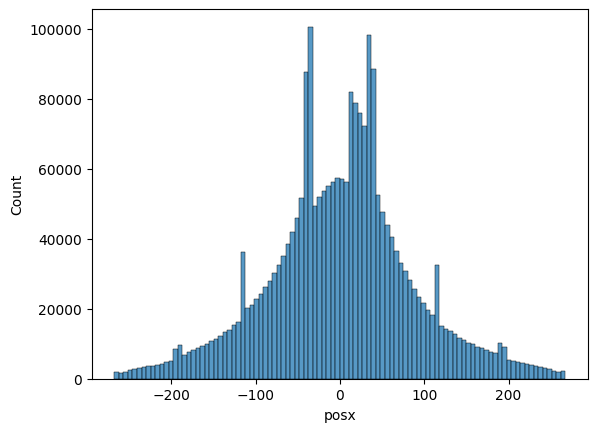

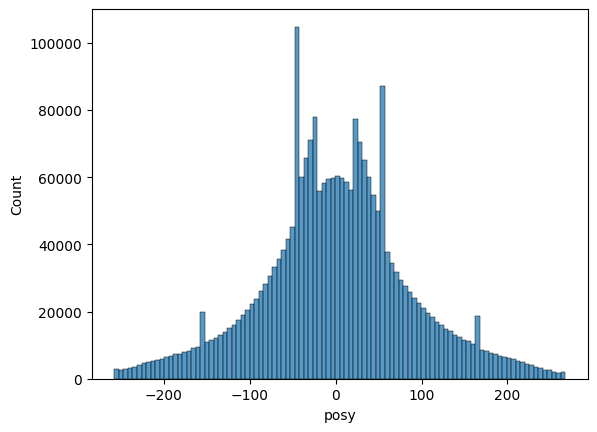

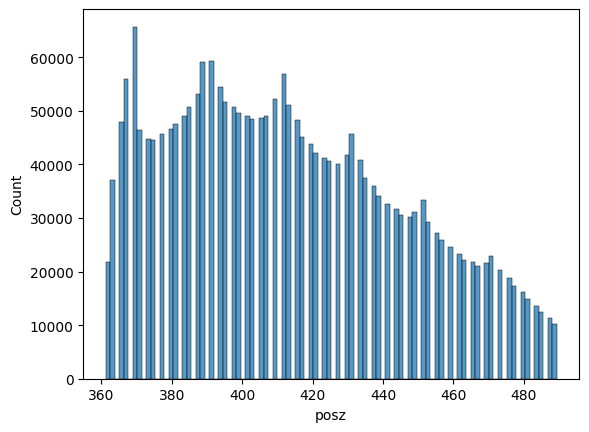

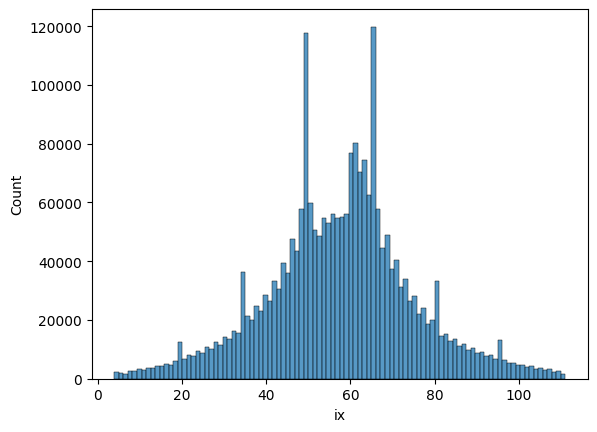

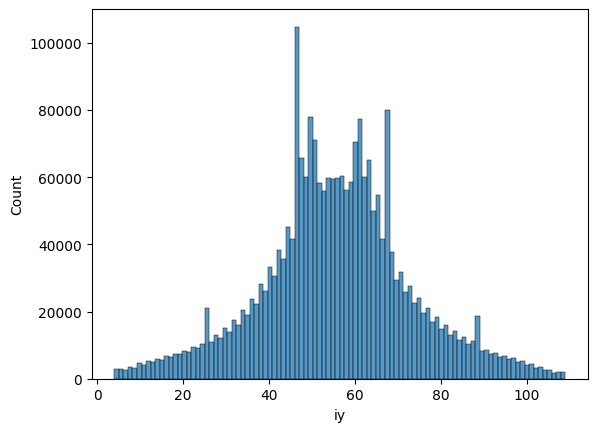

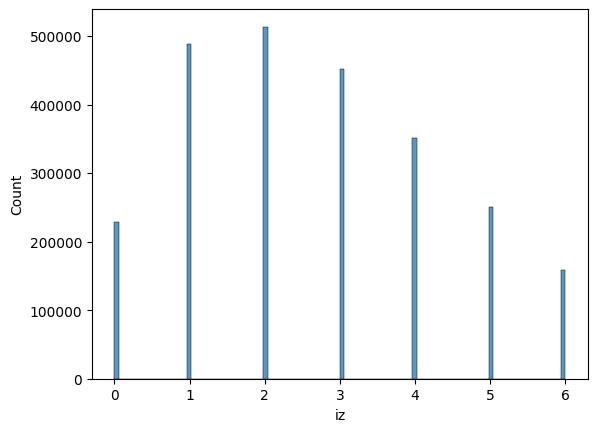

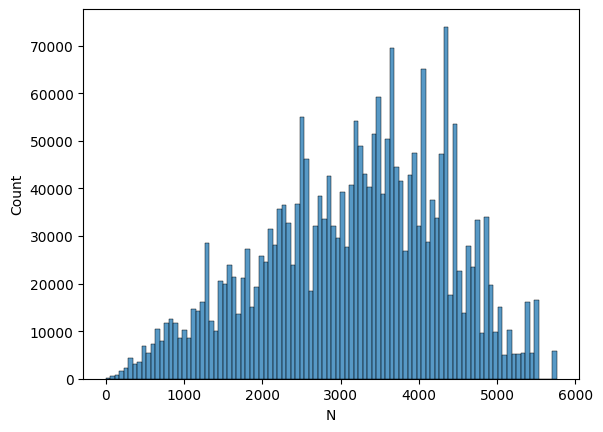

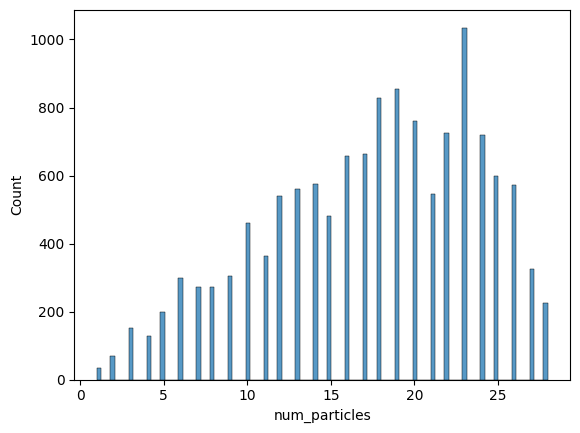

In [5]:
# Make sns histogram of each variable
# Add a column to count the number of clusters in each event, grouped by clusterID
events["num_particles"] = events.drop_duplicates(subset=["clusterID"]).groupby("event")["event"].transform("count")
events["logE"] = np.log(events["E"])
columns_to_histogram = ["logE", "T", "posx", "posy", "posz", "ix", "iy", "iz", "N", "num_particles"]
for column in columns_to_histogram:
    sns.histplot(events[column], bins=100)
    plt.show()

We can make some initial observations about this data...
- The (x,y) plane is bounded by (-270, 270)
- The energy distribution is a long-tail, with most of the hits having a **tiny** amount of energy, and a few hits having a **huge** amount of energy
- A typical event has 3000 - 4000 hits (i.e. energy deposits)
- A typical event has 15 - 25 particles involved in leaving energy deposits
- The time distribution is also a long-tail, with most of the hits being left in the first 20 nanoseconds (adjusted with the offset)
- There is a quirky asymmetry in the x distribution - this is covered in the calorimeter slides!

## 4. Visualize some events in 2D space

Let's build up a visualization in an iterative way, using the above observations. First, let's select an event that has an average number of hits and particles, using the above distribution. 

In [6]:
typical_events = events[(events["N"] > 3000) & (events["N"] < 4000) & (events["num_particles"] > 15) & (events["num_particles"] < 25)]
typical_event = events[events["event"] == typical_events.iloc[0]["event"]]

In [7]:
typical_event

event  hit_number     N         E      T  ix  iy  iz       posx  \
1895  27001           0  3963  2.341605  13.33  93  50   0  162.62984   
1896  27001           1  3963  2.092928  16.13  94  51   4  197.37016   
1897  27001           2  3963  1.532065  13.60  92  50   1  167.54327   
1898  27001           3  3963  1.391849  16.05  95  50   4  192.45673   
1899  27001           4  3963  1.351021  15.98  95  51   4  192.45673   
...     ...         ...   ...       ...    ...  ..  ..  ..        ...   
5853  27001        3958  3963  0.001650  43.14  45  74   4  -77.37016   
5854  27001        3959  3963  0.001650  16.72  39  79   3  -87.54328   
5855  27001        3960  3963  0.001650  20.09  51  73   3  -47.37016   
5856  27001        3961  3963  0.001650  37.03  46  68   4  -62.45672   
5857  27001        3962  3963  0.001650  24.60  45  73   3  -57.54328   

         posy       posz             clusterID  Efrac             uniqueID  \
1895  -22.575  367.28000   9958641657352869518    1.0 -8488102416356682098   
1896  -27.425  443.27997   9958641657352869518    1.0 -3297620686144080811   
1897  -22.575  377.28000   9958641657352869518    1.0 -3144952269302828998   
1898  -22.575  439.27997   9958641657352869518    1.0 -1570202826219224247   
1899  -27.425  439.27997   9958641657352869518    1.0 -9074326880881026657   
...       ...        ...                   ...    ...                  ...   
5853   97.425  431.27997  12249417173565187742    1.0 -3030503557574130016   
5854  112.575  423.27997  12249417173565187742    1.0 -6691282978773846071   
5855   82.575  423.27997  12249417173565187742    1.0  1651169675047815720   
5856   67.425  443.27997  12249417173565187742    1.0  3887486180240906581   
5857   82.575  417.27997  12249417173565187742    1.0  3146129295235741853   

      num_particles      logE  
1895           20.0  0.850837  
1896            NaN  0.738564  
1897            NaN  0.426616  
1898            NaN  0.330633  
1899            NaN  0.300861  
...             ...       ...  
5853            NaN -6.407223  
5854            NaN -6.407223  
5855            NaN -6.407223  
5856            NaN -6.407223  
5857            NaN -6.407223  

[3963 rows x 16 columns]

Now, we understand the bounds of the (x,y) plane, so we can plot this

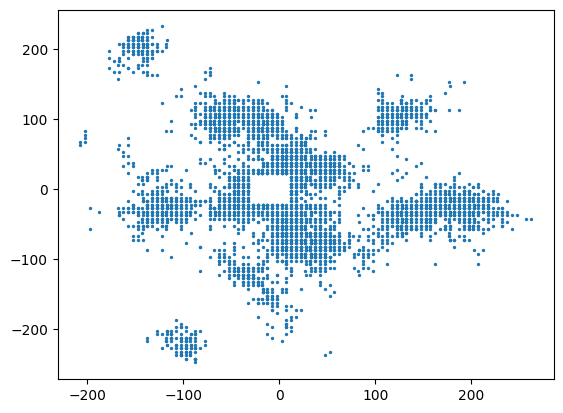

In [8]:
plt.scatter(typical_event.posx, typical_event.posy, s=2)

We also know that we have energy as a feature, and **it is a feature that is going to be used as a measure of importance in the scoring function**. So, let's use energy as an opacity for the points. We see that it has a long tail, so let's take the quartic root to more clearly see the clusters. (Try plotting the energy directly to see how sparse the clusters are!)

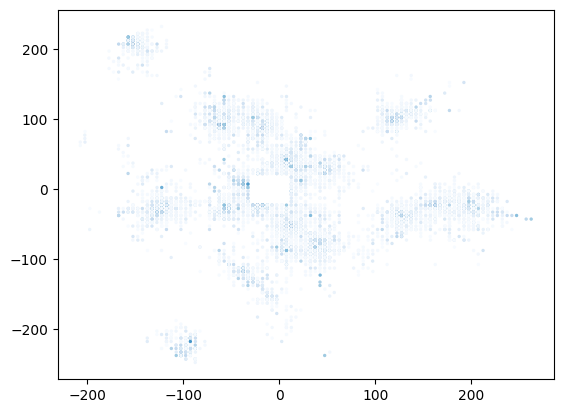

In [15]:
plt.scatter(typical_event.posx, typical_event.posy, s=2, cmap="Blues", c=typical_event.E**(1/4))

We see that there are not **so** many particles in each event, so we can color-code them without completely losing the thread of what is going on. Let's also weight the size of the hit by the energy, to more clearly see the effect (though now we are not to-scale!)

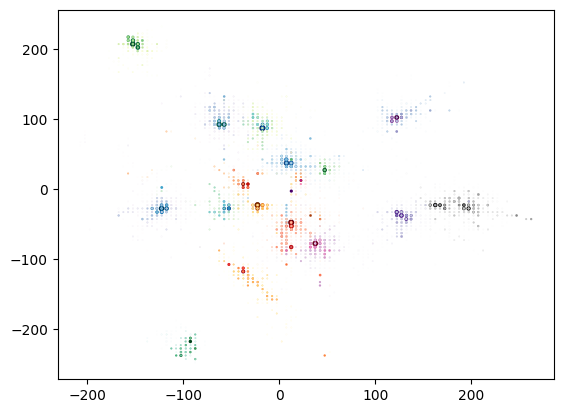

In [20]:
all_colors = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
              'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
              'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

for i, clusterID in enumerate(typical_event.clusterID.unique()[:len(all_colors)]):
    cluster = typical_event[typical_event["clusterID"] == clusterID]
    plt.scatter(cluster.posx, cluster.posy, cmap=all_colors[i], c=cluster.E**(1/4), s=cluster.E*2)

In the above Z-distribution, we clearly see that deposits are localized around each of the X layers in the z-direction. We can therefore visualize our hits in the (x,y) plane for each of the X layers. 

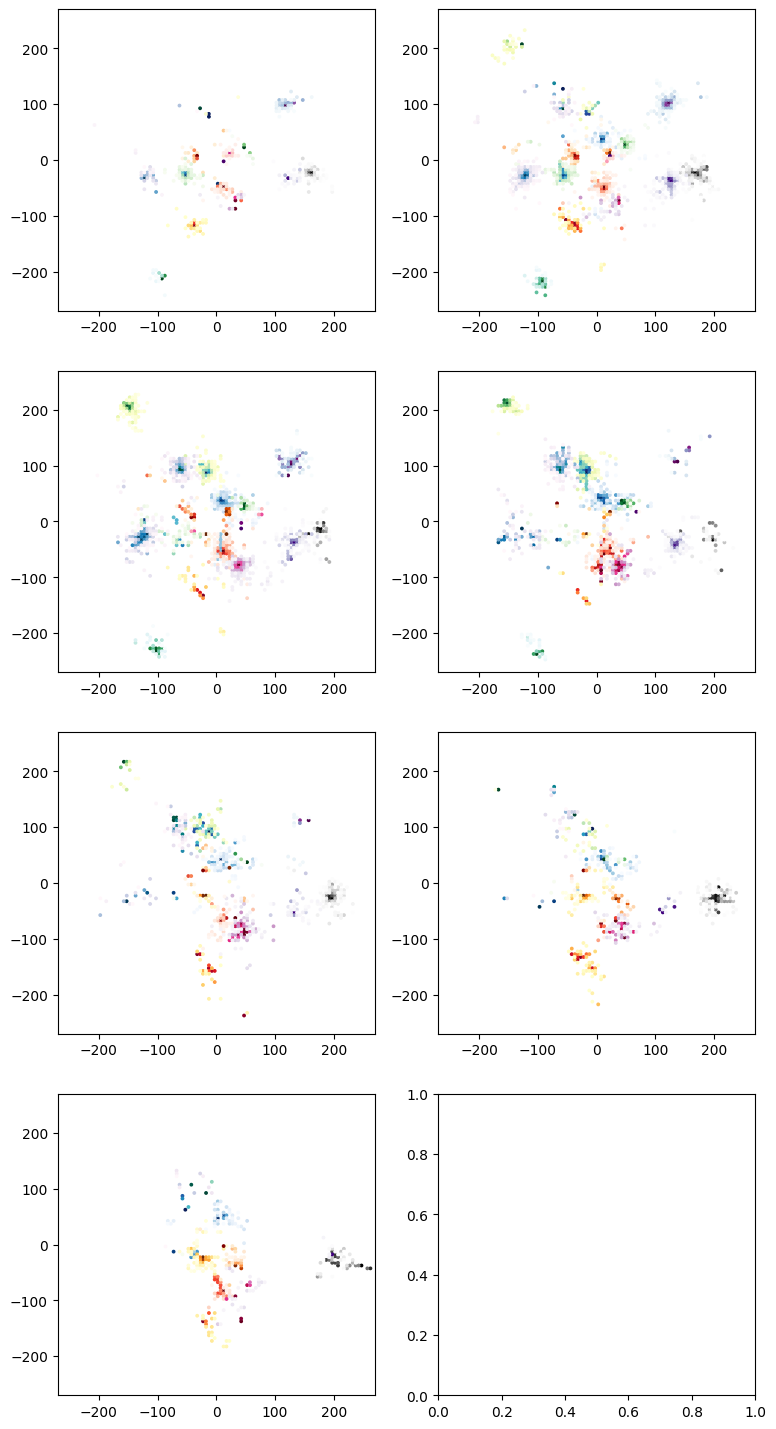

In [23]:
fig, axs = plt.subplots(4, 2, figsize=(9, 18))  # Create a 3x2 grid of subplots

for i, iz in enumerate(sorted(typical_event.iz.unique())):
    row = i // 2  # Calculate the row index based on the subplot position
    col = i % 2   # Calculate the column index based on the subplot position
    ax = axs[row, col]  # Get the correct subplot for the current iteration

    layer = typical_event[typical_event["iz"] == iz]

    for i, clusterID in enumerate(typical_event.clusterID.unique()[:len(all_colors)]):
        cluster = layer[layer["clusterID"] == clusterID]
        ax.scatter(cluster.posx, cluster.posy, cmap=all_colors[i], c=cluster.E**(1/4), s=3)
        # Make x, y bounds (-270, 270)
        ax.set_xlim(-270, 270)
        ax.set_ylim(-270, 270)

## 5. Visualize some events in 3D space

In 2D, the clusters are clearly visible, and we may even be able to identify some of them by eye. This is a good clue about where to start with our initial clustering algorithm. Let's see if we can do better by visualizing in 3D.

In [46]:
# 3d scatter with plotly with size given by energy
import plotly.express as px
fig = px.scatter_3d(typical_event, x='posx', y='posy', z='posz', color="clusterID", opacity=0.7)
fig.update_traces(marker=dict(size=2))
fig.update_layout(width=1000, height=1000, showlegend=False)
fig.show()

I don't know about you, but it's **harder** to visualize clusters in 3D. This is not just human error, but a real effect - the distance between clusters on a given layer is around the same as between layers. This means that if we naively apply a clustering algorithm, it will probably cluster by both particle and layer. This is okay, provided we then use the layer information to reconstruct the particles.

However, when we size by energy, we much more clearly see the cluster structure in 3D. This is a good clue that we should use energy as a feature in our clustering algorithm.

In [47]:
# 3d scatter with plotly with size given by energy
import plotly.express as px
fig = px.scatter_3d(typical_event, x='posx', y='posy', z='posz', color="clusterID", size="E", opacity=0.7)
fig.update_layout(width=1000, height=1000, showlegend=False)
fig.show()